In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
from astroML.plotting import scatter_contour
import seaborn as sns
c = 299792.458

In [2]:
fuji_sdss = pd.read_csv("fuji_pv_vs_sdss.csv")
fuji_sdss

,ra_1,dec_1,targetid_1,id,healpix,survey,program,targetid.1,z_1,zerr,...,s_2,es_2,Sn_2,logdist_2,logdist_err_2,logdist_alpha_2,logdist_corr,logdist_corr_err,logdist_corr_alpha,Separation
0,184.913600,-0.750861,39627769709071900,1516,26254,sv1,bright,39627769709071900,0.029896,0.000003,...,2.14374,0.01172,0.35531,-0.022683,0.097502,-0.525756,-0.040860,0.095050,-0.547014,0.113709
1,193.922076,27.250763,39628422523128777,1304,28149,sv1,bright,39628422523128777,0.023694,0.000007,...,2.41535,0.00538,1.00000,-0.001810,0.096055,-0.397190,0.038192,0.092604,-0.463153,0.028332
2,155.787603,32.907518,39632940354767051,764,5322,sv1,bright,39632940354767051,0.037276,0.000005,...,2.31762,0.00928,1.00000,-0.011851,0.097986,-0.566901,-0.017032,0.095540,-0.611431,0.044828
3,163.673104,47.451925,39633207917808010,830,5907,sv1,bright,39633207917808010,0.021767,0.000003,...,2.01695,0.01267,0.18011,0.082435,0.096777,-0.257630,0.096190,0.086367,-0.210012,0.084359
4,121.505853,39.964619,39633076141163860,990,6545,sv1,bright,39633076141163860,0.039935,0.000004,...,2.30854,0.00948,1.00000,0.037129,0.097713,-0.560834,0.028602,0.095281,-0.601838,0.092683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,253.397853,33.051466,39632941730499772,3529,9334,sv3,bright,39632941730499772,0.084868,0.000019,...,2.36517,0.01707,1.00000,-0.096299,0.106399,-0.489771,-0.071176,0.091470,-0.398836,0.058788
892,247.703678,42.392285,39633123280945563,3340,9984,sv3,bright,39633123280945563,0.093304,0.000023,...,2.24241,0.01450,1.00000,0.134279,0.102902,-0.570189,0.121443,0.105674,-0.674806,0.080435
893,252.120915,36.145967,39633006431830890,3351,9431,sv3,bright,39633006431830890,0.071456,0.000023,...,2.19952,0.01453,1.00000,0.048353,0.102407,-0.579409,0.035917,0.101782,-0.686911,0.031965
894,218.374730,3.905292,39627884997904170,3368,25982,sv3,bright,39627884997904170,0.086229,0.000022,...,2.24813,0.01876,0.88026,0.052369,0.105099,-0.555680,0.055738,0.096673,-0.529588,0.039748


In [3]:
fuji_sdss.columns.values

array(['ra_1', 'dec_1', 'targetid_1', 'id', 'healpix', 'survey',
       'program', 'targetid.1', 'z_1', 'zerr', 'zwarn', 'spectype',
       'subtype', 'deltachi2', 'healpix_id', 'obsconditions', 'release',
       'brickid_1', 'brick_objid', 'sersic_1', 'coadd_numexp',
       'coadd_exptime', 'coadd_numnight', 'coadd_numtile', 'healpix_id.1',
       'objid_1', 'brickid.1', 'brickname_1', 'ppxf_sigma',
       'ppxf_sigma_error', 'DER_SNR', 'snr_ppxf', 'TYPE', 'SERSIC_2',
       'Z_PHOT_MEDIAN', 'Z_PHOT_L95', 'mag_g', 'mag_r', 'mag_z', 'mag_B',
       'mag_g_err', 'mag_r_err', 'mag_z_err', 'fibre_mag_g',
       'fibre_mag_r', 'fibre_mag_z', 'uncor_radius', 'uncor_radius_err',
       'BA_ratio', 'BA_ratio_error', 'circ_radius', 'pos_angle', 'tmass',
       'flag', 'z_2', 'rmag', 'g_r_PS1_5_cor', 'W2_W3', 'W2_W3_err',
       'PS1_ibumpy', 'zcmb_1', 'zcmb_group_1', 'dz', 'dz_group', 'r_1',
       'er_1', 'kcor_r_1', 'kcor_g_1', 'i_1', 'ei_1', 's_1', 'es_1',
       'absmag_r_1', 'Sn_1', 'logd

In [4]:
pull_pipe = (fuji_sdss.logdist_2 - fuji_sdss.logdist_1)/(np.sqrt((fuji_sdss.logdist_err_1*fuji_sdss.logdist_err_1)+(fuji_sdss.logdist_err_2*fuji_sdss.logdist_err_2)))

In [14]:
diff = fuji_sdss.logdist_1 - fuji_sdss.logdist_2
diff_err = np.sqrt((fuji_sdss.logdist_err_1**2)+(fuji_sdss.logdist_err_2**2))
print (np.average(diff, weights=1./diff_err))
print (np.mean(diff))
print (np.std(diff)/np.sqrt(len(diff)))
delta_eta = np.average(diff, weights=1./diff_err**2)
print (round(np.average(diff, weights=1./diff_err**2),4),"+/-",round(np.std(diff)/np.sqrt(len(diff)),4))
print (delta_eta)

0.009887300196630776
0.010483588138938424
0.0016919998074301054
0.0093 +/- 0.0017
0.009295099830643338


In [13]:
fuji_pv = pd.read_csv("DESI_FP_logdists_fiducial.csv")
fuji_pv

,#fibermap_targetid,fibermap_i,ra_1,dec_1,targetid_1,id,healpix,survey,program,targetid.1,...,ei,s,es,absmag_r,Sn,logdist,logdist_err,logdist_alpha,pv,pverr
0,39628417112478213,400,192.260477,26.893112,39628417112478213,1301,28148,sv1,bright,39628417112478213,...,0.000279,2.154577,0.004325,-19.925132,1.000000,0.033927,0.095410,-0.097184,594.976580,1673.185069
1,39628417133447721,426,193.579225,27.068031,39628417133447721,1304,28149,sv1,bright,39628417133447721,...,0.000122,2.422567,0.002484,-22.520143,1.000000,0.187536,0.095063,0.167988,3694.813008,1872.927512
2,39627769709071900,191,184.913600,-0.750861,39627769709071900,1516,26254,sv1,bright,39627769709071900,...,0.000486,2.177125,0.004492,-19.991908,1.000000,-0.109745,0.095280,-0.337974,-2337.559597,2029.441278
3,39633076111803113,63,119.188267,39.927879,39633076111803113,996,6541,sv1,bright,39633076111803113,...,0.000241,2.298011,0.001769,-20.724064,1.000000,0.000921,0.099558,0.342711,8.263345,893.485385
4,39628422523128777,203,193.922076,27.250763,39628422523128777,1304,28149,sv1,bright,39628422523128777,...,0.000123,2.436203,0.002673,-20.874334,1.000000,-0.056939,0.095488,-0.182259,-961.881804,1613.103899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3191,39633236212580575,207,173.537567,49.254544,39633236212580575,2614,5618,sv2,bright,39633236212580575,...,0.001198,1.835153,0.035447,-19.362628,0.778542,0.025256,0.100769,-0.310789,654.810824,2612.689229
3192,39627658551629973,143,33.020696,-5.209266,39627658551629973,1090,17701,sv1,bright,39627658551629973,...,0.000254,2.113498,0.024009,-20.724069,1.000000,0.062590,0.097500,-0.296589,1759.218066,2740.431622
3193,39627598560494826,238,36.342130,-7.851704,39627598560494826,1185,36783,sv1,bright,39627598560494826,...,0.000345,2.025392,0.030752,-20.193399,1.000000,0.110118,0.099183,-0.223999,2895.751478,2608.189607
3194,39633255741260888,1028,172.667534,50.617933,39633255741260888,2623,5615,sv2,bright,39633255741260888,...,0.000850,1.940012,0.035426,-21.045145,1.000000,0.305660,0.100221,-0.219622,12189.675124,3996.803359


In [15]:
fuji_pv["logdist_corr"] = fuji_pv["logdist"] - delta_eta
fuji_pv["logdist_err_corr"] = np.sqrt(fuji_pv["logdist_err"]**2 + 0.0017**2)
fuji_pv

,#fibermap_targetid,fibermap_i,ra_1,dec_1,targetid_1,id,healpix,survey,program,targetid.1,...,es,absmag_r,Sn,logdist,logdist_err,logdist_alpha,pv,pverr,logdist_corr,logdist_err_corr
0,39628417112478213,400,192.260477,26.893112,39628417112478213,1301,28148,sv1,bright,39628417112478213,...,0.004325,-19.925132,1.000000,0.033927,0.095410,-0.097184,594.976580,1673.185069,0.024632,0.095425
1,39628417133447721,426,193.579225,27.068031,39628417133447721,1304,28149,sv1,bright,39628417133447721,...,0.002484,-22.520143,1.000000,0.187536,0.095063,0.167988,3694.813008,1872.927512,0.178241,0.095078
2,39627769709071900,191,184.913600,-0.750861,39627769709071900,1516,26254,sv1,bright,39627769709071900,...,0.004492,-19.991908,1.000000,-0.109745,0.095280,-0.337974,-2337.559597,2029.441278,-0.119040,0.095295
3,39633076111803113,63,119.188267,39.927879,39633076111803113,996,6541,sv1,bright,39633076111803113,...,0.001769,-20.724064,1.000000,0.000921,0.099558,0.342711,8.263345,893.485385,-0.008374,0.099572
4,39628422523128777,203,193.922076,27.250763,39628422523128777,1304,28149,sv1,bright,39628422523128777,...,0.002673,-20.874334,1.000000,-0.056939,0.095488,-0.182259,-961.881804,1613.103899,-0.066234,0.095503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3191,39633236212580575,207,173.537567,49.254544,39633236212580575,2614,5618,sv2,bright,39633236212580575,...,0.035447,-19.362628,0.778542,0.025256,0.100769,-0.310789,654.810824,2612.689229,0.015960,0.100784
3192,39627658551629973,143,33.020696,-5.209266,39627658551629973,1090,17701,sv1,bright,39627658551629973,...,0.024009,-20.724069,1.000000,0.062590,0.097500,-0.296589,1759.218066,2740.431622,0.053295,0.097515
3193,39627598560494826,238,36.342130,-7.851704,39627598560494826,1185,36783,sv1,bright,39627598560494826,...,0.030752,-20.193399,1.000000,0.110118,0.099183,-0.223999,2895.751478,2608.189607,0.100823,0.099198
3194,39633255741260888,1028,172.667534,50.617933,39633255741260888,2623,5615,sv2,bright,39633255741260888,...,0.035426,-21.045145,1.000000,0.305660,0.100221,-0.219622,12189.675124,3996.803359,0.296365,0.100235


In [18]:
omega_m = 0.31               # Matter density
deccel = 3.0*omega_m/2.0 - 1.0
czmod = c*fuji_pv["zcmb"].to_numpy()*(1.0 + 0.5*(1.0 - deccel)*(fuji_pv["zcmb"].to_numpy()) - (1.0/6.0)*(2.0 - deccel - 3.0*deccel*deccel)*(fuji_pv["zcmb"].to_numpy())**2)
fuji_pv["pv_corr"] = np.log(10.0)*czmod/(1.0 + czmod/c)*fuji_pv["logdist_corr"].to_numpy()
fuji_pv["pverr_corr"] = np.log(10.0)*czmod/(1.0 + czmod/c)*fuji_pv["logdist_err_corr"].to_numpy()
fuji_pv

,#fibermap_targetid,fibermap_i,ra_1,dec_1,targetid_1,id,healpix,survey,program,targetid.1,...,Sn,logdist,logdist_err,logdist_alpha,pv,pverr,logdist_corr,logdist_err_corr,pv_corr,pverr_corr
0,39628417112478213,400,192.260477,26.893112,39628417112478213,1301,28148,sv1,bright,39628417112478213,...,1.000000,0.033927,0.095410,-0.097184,594.976580,1673.185069,0.024632,0.095425,431.970315,1673.450645
1,39628417133447721,426,193.579225,27.068031,39628417133447721,1304,28149,sv1,bright,39628417133447721,...,1.000000,0.187536,0.095063,0.167988,3694.813008,1872.927512,0.178241,0.095078,3511.681867,1873.226965
2,39627769709071900,191,184.913600,-0.750861,39627769709071900,1516,26254,sv1,bright,39627769709071900,...,1.000000,-0.109745,0.095280,-0.337974,-2337.559597,2029.441278,-0.119040,0.095295,-2535.543937,2029.764284
3,39633076111803113,63,119.188267,39.927879,39633076111803113,996,6541,sv1,bright,39633076111803113,...,1.000000,0.000921,0.099558,0.342711,8.263345,893.485385,-0.008374,0.099572,-75.155860,893.615633
4,39628422523128777,203,193.922076,27.250763,39628422523128777,1304,28149,sv1,bright,39628422523128777,...,1.000000,-0.056939,0.095488,-0.182259,-961.881804,1613.103899,-0.066234,0.095503,-1118.906234,1613.359520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3191,39633236212580575,207,173.537567,49.254544,39633236212580575,2614,5618,sv2,bright,39633236212580575,...,0.778542,0.025256,0.100769,-0.310789,654.810824,2612.689229,0.015960,0.100784,413.813168,2613.060992
3192,39627658551629973,143,33.020696,-5.209266,39627658551629973,1090,17701,sv1,bright,39627658551629973,...,1.000000,0.062590,0.097500,-0.296589,1759.218066,2740.431622,0.053295,0.097515,1497.961265,2740.848149
3193,39627598560494826,238,36.342130,-7.851704,39627598560494826,1185,36783,sv1,bright,39627598560494826,...,1.000000,0.110118,0.099183,-0.223999,2895.751478,2608.189607,0.100823,0.099198,2651.320710,2608.572696
3194,39633255741260888,1028,172.667534,50.617933,39633255741260888,2623,5615,sv2,bright,39633255741260888,...,1.000000,0.305660,0.100221,-0.219622,12189.675124,3996.803359,0.296365,0.100235,11818.987755,3997.378311


In [19]:
fuji_pv.to_csv('fuji_pv_new.csv',index=False,header=True)

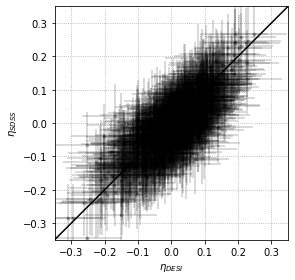

In [6]:
fig, ax = plt.subplots()
ax.set_ylim(-0.35,0.35)
ax.set_xlim(-0.35,0.35)
xxx=[-0.4,0.4];yyy=[-0.4,0.4]
ax.errorbar(fuji_sdss.logdist_1,fuji_sdss.logdist_2,xerr=fuji_sdss.logdist_err_1,yerr=fuji_sdss.logdist_err_2,fmt=".k",alpha=0.2)
ax.scatter(fuji_sdss.logdist_1,fuji_sdss.logdist_2,color='black',alpha=0.2,edgecolor='none',s=3.5)
ax.plot(xxx,yyy,color="black")
ax.set_aspect(1)
ax.set_xlabel(r'$\eta_{DESI}$')
ax.set_ylabel(r'$\eta_{SDSS}$')
plt.grid(b=True, which='both', color='0.65',linestyle=':')
#plt.legend()#,frameon=False)
plt.tight_layout()
plt.savefig('fuji_vs_sdss_logdist.png')
plt.savefig('fuji_vs_sdss_logdist.pdf')
plt.show()

No handles with labels found to put in legend.


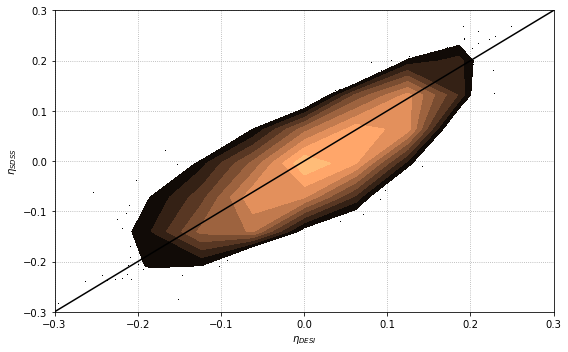

In [7]:
xfit = np.linspace(-0.3, 0.3)
# sfit = np.linspace(1.5,3.0)
# ifit = np.linspace(0.8,4.5)
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_xlim(-0.3,0.3)
ax.set_ylim(-0.3,0.3)
scatter_contour(fuji_sdss.logdist_1, fuji_sdss.logdist_2, threshold=10, log_counts=True, ax=ax,
                histogram2d_args=dict(bins=10),
                plot_args=dict(marker=',', linestyle='none', color='black'),
                contour_args=dict(cmap=plt.cm.copper))
ax.plot(xfit,xfit,c='black')#,label='FP parameters (Said et al. 2020)')
#ax.plot(xfit, (1.32696*sfit) - (0.785787*ifit) - 0.467, '-r',label='3D Gaussian')
# ax.text(-0.35,1.125-0.2,"3D Gaussian fit for Fuji r-band Fundamental Plane using "+str(len(r_desi))+" galaxies:")
# ax.text(-0.35,1.0-0.2, r'$a = 1.097, b = -0.790, c = -0.004$')
# ax.text(-0.35,0.875-0.2, r'$\bar r=0.193, \bar s = 2.012, \bar i = 2.554$')
# ax.text(-0.35,0.75-0.2, r'$\sigma_1 = 0.044, \sigma_2 = 0.418, \sigma_3 = 0.342$')
ax.set_xlabel(r'$\eta_{DESI}$')
ax.set_ylabel(r'$\eta_{SDSS}$')
#plt.xticks(color='w')
#plt.yticks(color='w')
plt.legend(framealpha=0.0)
ax.grid(b=True, which='both', color='0.65',linestyle=':')
plt.tight_layout()
plt.savefig('fuji_vs_sdss_contour.png')
#plt.savefig('FP_fuji.pdf')
plt.show()

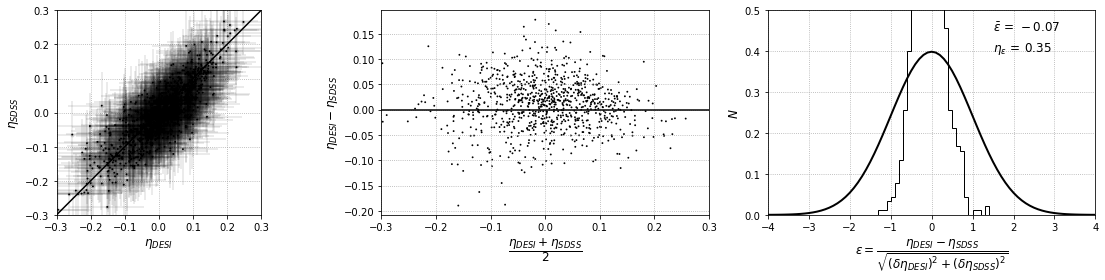

In [8]:
f_1, ((ax1, ax2, ax3)) = plt.subplots(nrows=1,ncols=3, figsize=(16, 4),sharex=False, sharey=False)
ax1.set_ylim(-0.3,0.3)
ax1.set_xlim(-0.3,0.3)
xxx=[-0.3,0.3];yyy=[-0.3,0.3]
ax1.errorbar(fuji_sdss.logdist_1,fuji_sdss.logdist_2,xerr=fuji_sdss.logdist_err_1,yerr=fuji_sdss.logdist_err_2,fmt=".k",alpha=0.1)
ax1.scatter(fuji_sdss.logdist_1,fuji_sdss.logdist_2,color='black',edgecolor='none',s=3.5)
ax1.plot(xxx,yyy,color="black")
ax1.grid(b=True, which='both', color='0.65',linestyle=':')
ax1.set_aspect(1)
ax1.set_xlabel(r'$\eta_{DESI}$',size=12)
ax1.set_ylabel(r'$\eta_{SDSS}$',size=12)

#ax2.set_ylim(-200,200)
ax2.set_xlim(-0.3,0.3)
ax2.scatter(((fuji_sdss.logdist_1+fuji_sdss.logdist_2)/2.),fuji_sdss.logdist_1-fuji_sdss.logdist_2,color='black',edgecolor='none',s=3.5)
ax2.axhline(y=0.0,color="black")
ax2.grid(b=True, which='both', color='0.65',linestyle=':')
ax2.set_xlabel(r'$\dfrac{\eta_{DESI} + \eta_{SDSS}}{2}$',size=12)
ax2.set_ylabel(r'$\eta_{DESI} - \eta_{SDSS}$',size=12)
#ax2.set_aspect(1)

ax3.set_ylim(0.0,0.5)
ax3.set_xlim(-4.0,4.0)
events_prop, edges_prop, patches_prop = plt.hist(pull_pipe,bins=np.arange(-5.0,5.0,0.1),density=1,histtype='step',color='black',label='etastar_lamost vs. veldisp_sdss')#,label='Normalized uncorrected $P(r)$')#
y = norm.pdf(edges_prop, 0.0, 1.0)
l = ax3.plot(edges_prop, y, 'k', linewidth=2,label='Gaussian with mean 0 and $\eta$ 1')#,label='Gaussian fit to the uncorrected $P(r)$')
#plt.hist(pull_pipe,bins=arange(-5.0,5.0,0.1),color='black')
ax3.grid(b=True, which='both', color='0.65',linestyle=':')
ax3.set_xlabel(r'$\epsilon = \dfrac{\eta_{DESI} - \eta_{SDSS}}{\sqrt{(\delta \eta_{DESI})^2 + (\delta \eta_{SDSS})^2}}$',size=12)
ax3.set_ylabel(r'$N$',size=12)
ax3.text(1.5,0.45,r'$\bar{\epsilon}\/=\/'+'{0:.2f}'.format(np.mean(pull_pipe))+'$',size=12)#, fontname = 'Times New Roman',size=20)
ax3.text(1.5,0.4,r'$\eta_{\epsilon}\/=\/'+'{0:.2f}'.format(np.std(pull_pipe))+'$',size=12)

plt.tight_layout()
plt.savefig('fuji_pv_sdss.png')
plt.savefig('fuji_pv_sdss.pdf')
plt.show()

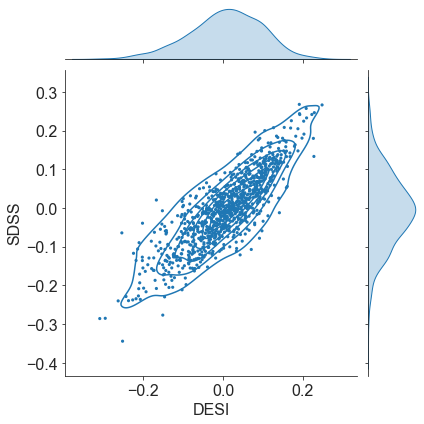

In [9]:
#sns.set(color_codes=True)
sns.set_style("ticks")
x = fuji_sdss.logdist_1
y = fuji_sdss.logdist_2
data = np.column_stack((x,y))
df = pd.DataFrame(data, columns=["x", "y"])
g = sns.JointGrid(x="x", y="y", data=df, space=-5.)
g = g.plot_joint(plt.scatter, s=10, edgecolor="None")
g = g.set_axis_labels(xlabel=r'DESI', ylabel=r'SDSS', fontsize = 16)
g = g.plot_joint(sns.kdeplot, zorder=10, levels=7)
g = g.plot_marginals(sns.kdeplot, shade=True)
#g = g.ax_joint.axhline(y=0.0,linestyle='--')
#g = sns.set(font_scale = 1.5)
#g = g.ax_marg_y.axhline(y=0.0)
plt.tick_params(axis="both", labelsize=16)
plt.tight_layout()
#plt.savefig('pv_method_1_vs_2_double_hist.png')
#plt.savefig('pv_method_1_vs_2_double_hist.pdf')
plt.show()